In [ ]:
# import random
# import pandas as pd

# random.seed(42)

# def generate_session(label):
#     if label == "normal":
#         return {
#             "typing_speed_cps": round(random.uniform(2.5, 4.8), 2),
#             "avg_pause_ms": random.randint(250, 750),
#             "max_pause_ms": random.randint(1000, 3000),
#             "edit_ratio": round(random.uniform(0.22, 0.48), 2),
#             "paste_events": 0,
#             "avg_paste_size": 0,
#             "revision_count": random.randint(8, 22),
#             "solution_time_sec": random.randint(900, 2000),
#             "code_complexity": round(random.uniform(0.30, 0.55), 2),
#             "label": "normal"
#         }
#     else:
#         return {
#             "typing_speed_cps": round(random.uniform(0.4, 1.3), 2),
#             "avg_pause_ms": random.randint(2500, 6500),
#             "max_pause_ms": random.randint(12000, 28000),
#             "edit_ratio": round(random.uniform(0.02, 0.10), 2),
#             "paste_events": random.randint(1, 4),
#             "avg_paste_size": random.randint(150, 450),
#             "revision_count": random.randint(0, 3),
#             "solution_time_sec": random.randint(200, 650),
#             "code_complexity": round(random.uniform(0.65, 0.95), 2),
#             "label": "anomalous"
#         }

# def generate_dataset(n_normal=700, n_anomalous=300):
#     data = []
#     session_id = 1

#     for _ in range(n_normal):
#         row = generate_session("normal")
#         row["session_id"] = f"S{session_id:05d}"
#         data.append(row)
#         session_id += 1

#     for _ in range(n_anomalous):
#         row = generate_session("anomalous")
#         row["session_id"] = f"S{session_id:05d}"
#         data.append(row)
#         session_id += 1

#     return pd.DataFrame(data)

# # Generate dataset
# df = generate_dataset()

# # Shuffle rows
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# # Save
# df.to_csv("behavioral_anomaly_dataset_1000.csv", index=False)

# print("Dataset shape:", df.shape)
# print(df.head())


Dataset shape: (1000, 11)
   typing_speed_cps  avg_pause_ms  max_pause_ms  edit_ratio  paste_events  \
0              3.77           281          1179        0.29             0   
1              0.62          3891         27748        0.08             4   
2              0.56          3785         17792        0.04             3   
3              2.84           281          2414        0.42             0   
4              2.81           253          2943        0.32             0   

   avg_paste_size  revision_count  solution_time_sec  code_complexity  \
0               0              10               1758             0.35   
1             450               0                446             0.68   
2             243               1                455             0.87   
3               0              11                966             0.39   
4               0              21               1678             0.50   

       label session_id  
0     normal     S00522  
1  anomalous     S00

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
df = pd.read_csv('behavioral_anomaly_dataset_1000.csv')

In [ ]:
df.sample(5)

,typing_speed_cps,avg_pause_ms,max_pause_ms,edit_ratio,paste_events,avg_paste_size,revision_count,solution_time_sec,code_complexity,label,session_id
273,3.13,713,2051,0.26,0,0,14,1087,0.54,normal,S00251
697,4.08,330,1900,0.33,0,0,15,1317,0.39,normal,S00298
71,2.91,741,2756,0.23,0,0,20,1758,0.36,normal,S00494
212,1.15,4340,27836,0.10,1,323,0,372,0.89,anomalous,S00926
680,4.45,663,1026,0.36,0,0,8,1680,0.34,normal,S00659


In [ ]:
df.shape

(1000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   typing_speed_cps   1000 non-null   float64
 1   avg_pause_ms       1000 non-null   int64  
 2   max_pause_ms       1000 non-null   int64  
 3   edit_ratio         1000 non-null   float64
 4   paste_events       1000 non-null   int64  
 5   avg_paste_size     1000 non-null   int64  
 6   revision_count     1000 non-null   int64  
 7   solution_time_sec  1000 non-null   int64  
 8   code_complexity    1000 non-null   float64
 9   label              1000 non-null   object 
 10  session_id         1000 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,typing_speed_cps,avg_pause_ms,max_pause_ms,edit_ratio,paste_events,avg_paste_size,revision_count,solution_time_sec,code_complexity
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.814250,1682.367000,7317.0290,0.261120,0.764000,91.640000,11.052000,1151.158000,0.537910
std,1.417045,1898.482859,8540.5693,0.146583,1.324409,148.045912,7.192289,543.849296,0.187359
min,0.400000,250.000000,1000.0000,0.020000,0.000000,0.000000,0.000000,202.000000,0.300000
25%,1.127500,453.000000,1710.5000,0.087500,0.000000,0.000000,3.000000,585.000000,0.390000
50%,3.155000,612.500000,2401.0000,0.290000,0.000000,0.000000,12.000000,1219.000000,0.480000
75%,4.010000,3094.000000,14391.0000,0.380000,1.000000,203.500000,17.000000,1608.750000,0.700000
max,4.800000,6490.000000,27974.0000,0.480000,4.000000,450.000000,22.000000,2000.000000,0.950000


In [ ]:
df.isnull().sum()

,0
typing_speed_cps,0
avg_pause_ms,0
max_pause_ms,0
edit_ratio,0
paste_events,0
avg_paste_size,0
revision_count,0
solution_time_sec,0
code_complexity,0
label,0


<Axes: xlabel='code_complexity', ylabel='solution_time_sec'>

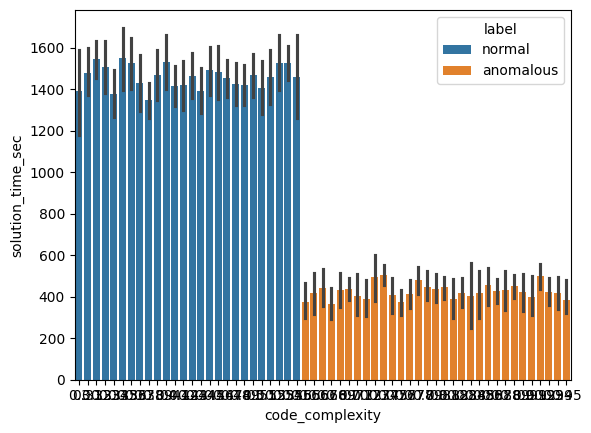

In [ ]:
sns.barplot(x=df['code_complexity'], y=df['solution_time_sec'], hue=df['label'])

In [ ]:
print(df["label"].value_counts())

label
normal       700
anomalous    300
Name: count, dtype: int64


In [ ]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [ ]:
df['label_encoded'].sample(5)

,label_encoded
802,1
249,1
784,1
216,1
527,1


In [ ]:
X = df.drop(columns=['session_id', 'label', 'label_encoded'])
y = df['label_encoded']

In [ ]:
X.sample(5)

,typing_speed_cps,avg_pause_ms,max_pause_ms,edit_ratio,paste_events,avg_paste_size,revision_count,solution_time_sec,code_complexity
996,3.64,504,1752,0.46,0,0,16,1446,0.50
394,2.75,282,1688,0.48,0,0,18,1565,0.52
694,0.86,4761,25436,0.06,3,265,1,417,0.83
456,1.22,2865,21547,0.02,4,215,2,231,0.76
523,3.69,294,1820,0.39,0,0,10,1187,0.42


In [ ]:
y.sample(5)

,label_encoded
517,1
239,1
503,0
118,1
502,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

In [ ]:
X_train.sample(5)

,typing_speed_cps,avg_pause_ms,max_pause_ms,edit_ratio,paste_events,avg_paste_size,revision_count,solution_time_sec,code_complexity
583,0.52,6077,12512,0.04,4,248,0,216,0.82
913,3.41,416,2754,0.29,0,0,15,925,0.50
324,0.43,4387,24047,0.08,2,392,3,548,0.94
611,3.46,742,2772,0.45,0,0,21,1570,0.53
300,2.82,631,1159,0.28,0,0,13,1243,0.46


In [ ]:
X_test.sample(5)

,typing_speed_cps,avg_pause_ms,max_pause_ms,edit_ratio,paste_events,avg_paste_size,revision_count,solution_time_sec,code_complexity
774,4.67,619,2280,0.35,0,0,17,1300,0.41
343,3.11,291,1321,0.28,0,0,16,1053,0.34
604,4.67,613,1854,0.40,0,0,22,1993,0.37
394,2.75,282,1688,0.48,0,0,18,1565,0.52
254,3.74,446,2547,0.41,0,0,20,1060,0.43


In [ ]:
y_train.sample(5)

,label_encoded
333,1
70,1
366,0
610,1
303,1


In [ ]:
y_test.sample(5)

,label_encoded
143,1
318,0
166,1
459,1
132,1


In [ ]:
rf = RandomForestClassifier(
    n_estimators = 200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(y_pred)

[1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
y_prob = rf.predict_proba(X_test)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[ 60   0]
 [  0 140]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       140

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

ROC-AUC Score: 1.0


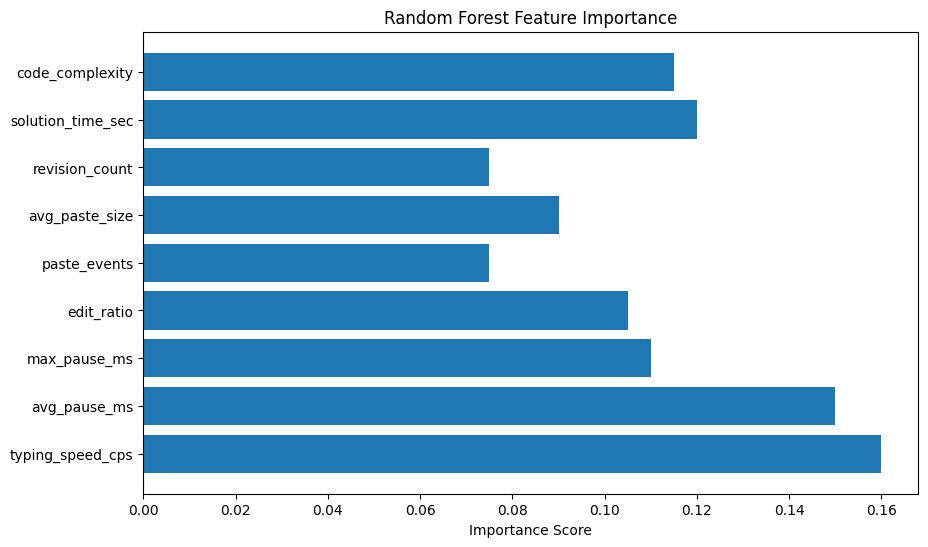

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.show()